In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

import pandas as pd

>> ## Prediction of Store Sales

>>> ## Preprocessing

## Load Datasets

In [2]:
train_data_path = 'Data/train.csv'
test_data_path ='Data/test.csv'
store_data_path ='Data/store.csv'

In [3]:
from scripts.data_loader import load_data

In [4]:
train_data, test_data, store_data = load_data(train_data_path,test_data_path,store_data_path)


2025-01-13 09:13:11,729 - INFO - Loading data from file...
2025-01-13 09:13:13,623 - INFO - Train Data, Test Data and Store Data loaded with shape (1017209, 9), (41088, 8), and (1115, 10) respectively


In [5]:

train_data = pd.merge(train_data, store_data, on='Store', how='inner')
test_data = pd.merge(test_data, store_data, on='Store', how='inner')

In Our dataset of stateHoliday columns have 0(int) and 0(str) so we have to convert into the same type 

In [6]:
def replace_0_state_holiday(char):
    if char == 0:
        return '0'
    else:
        return char
train_data['StateHoliday'] = train_data['StateHoliday'].apply(replace_0_state_holiday)
test_data['StateHoliday'] = test_data['StateHoliday'].apply(replace_0_state_holiday)

In [7]:
train_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


#### Create all the date features from our date columns

In [8]:
from scripts.feature_engineering import create_date_features

train_data=create_date_features(train_data)

2025-01-13 09:13:43,464 - INFO - Creating date features.
2025-01-13 09:13:43,464 - INFO - Creating date features.


In [9]:
train_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,1
5,6,5,2015-07-31,5651,589,1,1,0,1,a,...,2013.0,0,NaN,NaN,NaN,2015,7,31,31,1
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,...,2013.0,0,NaN,NaN,NaN,2015,7,31,31,1
7,8,5,2015-07-31,8492,833,1,1,0,1,a,...,2014.0,0,NaN,NaN,NaN,2015,7,31,31,1
8,9,5,2015-07-31,8565,687,1,1,0,1,a,...,2000.0,0,NaN,NaN,NaN,2015,7,31,31,1
9,10,5,2015-07-31,7185,681,1,1,0,1,a,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,1


In [10]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'IsWeekend'],
      dtype='object')

In [11]:
test_data.head(10)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
5,6,10,4,2015-09-17,1.0,1,0,0,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
6,7,11,4,2015-09-17,1.0,1,0,0,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
7,8,12,4,2015-09-17,1.0,1,0,0,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
8,9,13,4,2015-09-17,1.0,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
9,10,14,4,2015-09-17,1.0,1,0,0,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"


#### Create all date features from date column for test dataset

In [12]:
test_data=create_date_features(test_data)


2025-01-13 09:13:44,739 - INFO - Creating date features.
2025-01-13 09:13:44,739 - INFO - Creating date features.


In [13]:
test_data.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,2008.0,0,NaN,NaN,NaN,2015,9,17,38,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,2013.0,0,NaN,NaN,NaN,2015,9,17,38,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,2014.0,0,NaN,NaN,NaN,2015,9,17,38,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,2000.0,0,NaN,NaN,NaN,2015,9,17,38,0
5,6,10,4,2015-09-17,1.0,1,0,0,a,a,...,2009.0,0,NaN,NaN,NaN,2015,9,17,38,0
6,7,11,4,2015-09-17,1.0,1,0,0,a,c,...,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
7,8,12,4,2015-09-17,1.0,1,0,0,a,c,...,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
8,9,13,4,2015-09-17,1.0,1,0,0,d,a,...,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,9,17,38,0
9,10,14,4,2015-09-17,1.0,1,0,0,a,a,...,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0


#### Check missing columns

In [14]:
missing_cols_in_test = set(train_data.columns) - set(test_data.columns)
print(missing_cols_in_test)

{'Customers', 'Sales'}


In [15]:
train_data = train_data.drop(columns='Customers')


In [16]:
missing_cols_in_test = set(train_data.columns) - set(test_data.columns)
print(missing_cols_in_test)

{'Sales'}


In [17]:
merged_train_data_store = pd.merge(train_data, store_data, on='Store', how='inner')
merged_test_data_store = pd.merge(test_data, store_data, on='Store', how='inner')


merged_train_data_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType_x', 'Assortment_x', 'CompetitionDistance_x',
       'CompetitionOpenSinceMonth_x', 'CompetitionOpenSinceYear_x', 'Promo2_x',
       'Promo2SinceWeek_x', 'Promo2SinceYear_x', 'PromoInterval_x', 'Year',
       'Month', 'Day', 'WeekOfYear', 'IsWeekend', 'StoreType_y',
       'Assortment_y', 'CompetitionDistance_y', 'CompetitionOpenSinceMonth_y',
       'CompetitionOpenSinceYear_y', 'Promo2_y', 'Promo2SinceWeek_y',
       'Promo2SinceYear_y', 'PromoInterval_y'],
      dtype='object')

In [18]:
missing_cols_in_train = set(test_data.columns) - set(train_data.columns)
print(missing_cols_in_train)

{'Id'}


In [19]:
test_data = test_data.drop(columns='Id')

In [20]:
missing_cols_in_train = set(test_data.columns) - set(train_data.columns)
print(missing_cols_in_train)

set()


Beginning of the month, mid-month, and end of the month

In [21]:
from scripts.feature_engineering import month_period

train_data['MonthPeriod'] = train_data['Date'].dt.day.apply(month_period)
test_data['MonthPeriod'] = test_data['Date'].dt.day.apply(month_period)
train_data.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend,MonthPeriod
0,1,5,2015-07-31,5263,1,1,0,1,c,a,...,0,NaN,NaN,NaN,2015,7,31,31,1,end
1,2,5,2015-07-31,6064,1,1,0,1,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1,end
2,3,5,2015-07-31,8314,1,1,0,1,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1,end
3,4,5,2015-07-31,13995,1,1,0,1,c,c,...,0,NaN,NaN,NaN,2015,7,31,31,1,end
4,5,5,2015-07-31,4822,1,1,0,1,a,a,...,0,NaN,NaN,NaN,2015,7,31,31,1,end


### Extract and sort holiday dates where 'StateHoliday' is a holiday ('a', 'b', 'c' indicate holidays)


In [22]:
import numpy as np
train_data['Date'] = pd.to_datetime(train_data['Date'])

holiday_dates = train_data[train_data['StateHoliday'].isin(['a', 'b', 'c'])]['Date'].unique()

holiday_dates = np.sort(holiday_dates)
print(holiday_dates)

['2013-01-01T00:00:00.000000000' '2013-01-06T00:00:00.000000000'
 '2013-03-29T00:00:00.000000000' '2013-04-01T00:00:00.000000000'
 '2013-05-01T00:00:00.000000000' '2013-05-09T00:00:00.000000000'
 '2013-05-20T00:00:00.000000000' '2013-05-30T00:00:00.000000000'
 '2013-08-15T00:00:00.000000000' '2013-10-03T00:00:00.000000000'
 '2013-10-31T00:00:00.000000000' '2013-11-01T00:00:00.000000000'
 '2013-11-20T00:00:00.000000000' '2013-12-25T00:00:00.000000000'
 '2013-12-26T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '2014-01-06T00:00:00.000000000' '2014-04-18T00:00:00.000000000'
 '2014-04-21T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2014-05-29T00:00:00.000000000' '2014-06-09T00:00:00.000000000'
 '2014-06-19T00:00:00.000000000' '2014-10-03T00:00:00.000000000'
 '2014-10-31T00:00:00.000000000' '2014-11-01T00:00:00.000000000'
 '2014-11-19T00:00:00.000000000' '2014-12-25T00:00:00.000000000'
 '2014-12-26T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2015-01-06T00:00:00.000

### Calculate the days to the nearest future or past holiday for a specific holiday type
### Split holiday types 'a', 'b', 'c' into separate lists

In [23]:
from scripts.feature_engineering import splitHolidayTypeToLists
holiday_a_dates_train, holiday_b_dates_train, holiday_c_dates_train = splitHolidayTypeToLists(train_data)
holiday_a_dates_test, holiday_b_dates_test, holiday_c_dates_test = splitHolidayTypeToLists(test_data)


In [24]:
from scripts.feature_engineering import assign_days_to_and_after_holiday
train_data= assign_days_to_and_after_holiday(train_data,holiday_a_dates_train, holiday_b_dates_train, holiday_c_dates_train)


In [25]:
test_data=assign_days_to_and_after_holiday(test_data,holiday_a_dates_test, holiday_b_dates_test, holiday_c_dates_test)
    

New feature columns of Training Datasets

In [26]:

print(train_data[['Date', 'StateHoliday', 'DaysTo_A_Holiday', 'DaysTo_B_Holiday', 'DaysTo_C_Holiday', 
                               'DaysAfter_A_Holiday', 'DaysAfter_B_Holiday', 'DaysAfter_C_Holiday']])


              Date StateHoliday  DaysTo_A_Holiday  DaysTo_B_Holiday  \
0       2015-07-31            0                -1                -1   
1       2015-07-31            0                -1                -1   
2       2015-07-31            0                -1                -1   
3       2015-07-31            0                -1                -1   
4       2015-07-31            0                -1                -1   
...            ...          ...               ...               ...   
1017204 2013-01-01            a                 0                87   
1017205 2013-01-01            a                 0                87   
1017206 2013-01-01            a                 0                87   
1017207 2013-01-01            a                 0                87   
1017208 2013-01-01            a                 0                87   

         DaysTo_C_Holiday  DaysAfter_A_Holiday  DaysAfter_B_Holiday  \
0                      -1                   57                  116   
1    

In [27]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Day,WeekOfYear,IsWeekend,MonthPeriod,DaysTo_A_Holiday,DaysTo_B_Holiday,DaysTo_C_Holiday,DaysAfter_A_Holiday,DaysAfter_B_Holiday,DaysAfter_C_Holiday
0,1,5,2015-07-31,5263,1,1,0,1,c,a,...,31,31,1,end,-1,-1,-1,57,116,217
1,2,5,2015-07-31,6064,1,1,0,1,a,a,...,31,31,1,end,-1,-1,-1,57,116,217
2,3,5,2015-07-31,8314,1,1,0,1,a,a,...,31,31,1,end,-1,-1,-1,57,116,217
3,4,5,2015-07-31,13995,1,1,0,1,c,c,...,31,31,1,end,-1,-1,-1,57,116,217
4,5,5,2015-07-31,4822,1,1,0,1,a,a,...,31,31,1,end,-1,-1,-1,57,116,217


New feature Columns of Test Datasets

In [28]:

print(test_data[['Date', 'StateHoliday', 'DaysTo_A_Holiday', 'DaysTo_B_Holiday', 'DaysTo_C_Holiday', 
                               'DaysAfter_A_Holiday', 'DaysAfter_B_Holiday', 'DaysAfter_C_Holiday']])


            Date StateHoliday  DaysTo_A_Holiday  DaysTo_B_Holiday  \
0     2015-09-17            0                -1                 0   
1     2015-09-17            0                -1                 0   
2     2015-09-17            0                -1                 0   
3     2015-09-17            0                -1                 0   
4     2015-09-17            0                -1                 0   
...          ...          ...               ...               ...   
41083 2015-08-01            0                14                 0   
41084 2015-08-01            0                14                 0   
41085 2015-08-01            0                14                 0   
41086 2015-08-01            0                14                 0   
41087 2015-08-01            0                14                 0   

       DaysTo_C_Holiday  DaysAfter_A_Holiday  DaysAfter_B_Holiday  \
0                     0                   33                    0   
1                     0          

In [29]:
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Day,WeekOfYear,IsWeekend,MonthPeriod,DaysTo_A_Holiday,DaysTo_B_Holiday,DaysTo_C_Holiday,DaysAfter_A_Holiday,DaysAfter_B_Holiday,DaysAfter_C_Holiday
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,...,17,38,0,middle,-1,0,0,33,0,0
1,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,...,17,38,0,middle,-1,0,0,33,0,0
2,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,...,17,38,0,middle,-1,0,0,33,0,0
3,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,...,17,38,0,middle,-1,0,0,33,0,0
4,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,...,17,38,0,middle,-1,0,0,33,0,0


In [30]:
train_data = train_data.drop('Date',axis=1)
test_data = test_data.drop('Date',axis=1)

In [31]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'WeekOfYear', 'IsWeekend', 'MonthPeriod', 'DaysTo_A_Holiday',
       'DaysTo_B_Holiday', 'DaysTo_C_Holiday', 'DaysAfter_A_Holiday',
       'DaysAfter_B_Holiday', 'DaysAfter_C_Holiday'],
      dtype='object')

In [32]:
test_data['MonthPeriod']

0           middle
1           middle
2           middle
3           middle
4           middle
           ...    
41083    beginning
41084    beginning
41085    beginning
41086    beginning
41087    beginning
Name: MonthPeriod, Length: 41088, dtype: object

In [33]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'WeekOfYear', 'IsWeekend', 'MonthPeriod', 'DaysTo_A_Holiday',
       'DaysTo_B_Holiday', 'DaysTo_C_Holiday', 'DaysAfter_A_Holiday',
       'DaysAfter_B_Holiday', 'DaysAfter_C_Holiday'],
      dtype='object')

In [34]:
train_data1 = train_data.drop('Sales', axis=1)


In [35]:
test_data.columns == train_data1.columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

Pre- Procesed Data 

In [36]:
from scripts.feature_engineering import get_preprocessed_test_data

test_data_preprocessed_df = get_preprocessed_test_data(test_data)


In [37]:
from  scripts.feature_engineering import get_preprocessed_train_data
train_data_preprocessed_df = get_preprocessed_train_data(train_data)


In [38]:
train_data_preprocessed_df.head(10)

,Sales,Store,DayOfWeek,DaysTo_A_Holiday,SchoolHoliday,DaysAfter_A_Holiday,DaysTo_B_Holiday,DaysAfter_B_Holiday,DaysTo_C_Holiday,DaysAfter_C_Holiday,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_nan,MonthPeriod_beginning,MonthPeriod_end,MonthPeriod_middle
0,-0.132683,-1.731640,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.075373,-1.728534,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.659800,-1.725427,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2.135414,-1.722321,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.247231,-1.719214,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,-0.031902,-1.716108,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,2.485810,-1.713001,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.706035,-1.709895,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.724996,-1.706789,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.366548,-1.703682,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [39]:
test_data_preprocessed_df.head(10)


,Store,DayOfWeek,DaysTo_A_Holiday,SchoolHoliday,DaysAfter_A_Holiday,DaysTo_B_Holiday,DaysAfter_B_Holiday,DaysTo_C_Holiday,DaysAfter_C_Holiday,Open,...,Assortment_c,StateHoliday_0,StateHoliday_a,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_nan,MonthPeriod_beginning,MonthPeriod_end,MonthPeriod_middle
0,-1.732596,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.726351,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.713862,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.710739,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.707617,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,-1.704495,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,-1.701372,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,-1.698250,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,-1.695128,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,-1.692005,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412939,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [40]:
test_data_preprocessed_df.rename(columns={'PromoInterval_Feb,May,Aug,Nov': 'PromoInterval_Feb_May_Aug_Nov', 'PromoInterval_Jan,Apr,Jul,Oct': 'PromoInterval_Jan_Apr_Jul_Oct','PromoInterval_Mar,Jun,Sept,Dec':'PromoInterval_Mar_Jun_Sept_Dec'}, inplace=True)


### Train and Evaluate Random Forest model

In [41]:
from scripts.ml_model import train_ml_model


In [42]:
pipeline,X_train,y_train =train_ml_model(train_data_preprocessed_df)


Validation RMSE: 0.4665326146108965
Validation MAE: 0.44948140570627004


Test Using Test datasets 

In [43]:
missing_cols = set(train_data_preprocessed_df.columns) - set(test_data_preprocessed_df.columns)


In [44]:
print(missing_cols)

{'PromoInterval_Feb,May,Aug,Nov', 'StateHoliday_b', 'PromoInterval_Jan,Apr,Jul,Oct', 'StateHoliday_c', 'PromoInterval_Mar,Jun,Sept,Dec'}


In [45]:
for col in ['StateHoliday_b','StateHoliday_c','PromoInterval_Mar,Jun,Sept,Dec','PromoInterval_Feb,May,Aug,Nov', 'StateHoliday_c', 'PromoInterval_Jan,Apr,Jul,Oct']:
        test_data_preprocessed_df[col] = 0

In [46]:
train_data_preprocessed_df.columns


Index(['Store', 'DayOfWeek', 'DaysTo_A_Holiday', 'SchoolHoliday',
       'DaysAfter_A_Holiday', 'DaysTo_B_Holiday', 'DaysAfter_B_Holiday',
       'DaysTo_C_Holiday', 'DaysAfter_C_Holiday', 'Open', 'Promo', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'IsWeekend', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'PromoInterval_nan', 'MonthPeriod_beginning', 'MonthPeriod_end',
       'MonthPeriod_middle'],
      dtype='object')

In [47]:
test_data_preprocessed_df = test_data_preprocessed_df[train_data_preprocessed_df.columns]


Predicts target values (y_test_pred) for the preprocessed test dataset using a pre-trained machine learning pipeline.

In [48]:
y_test_perd = pipeline.predict(test_data_preprocessed_df)
print(pd.DataFrame(y_test_perd))

              0
0      0.637827
1      0.637827
2      0.637827
3      0.637827
4      0.637827
...         ...
41083  0.040388
41084  0.040388
41085  0.040388
41086  0.040388
41087  0.040388

[41088 rows x 1 columns]


## Post Prediction Analysis

In [49]:
from scripts.ml_model import post_prediction_feature_importance
   

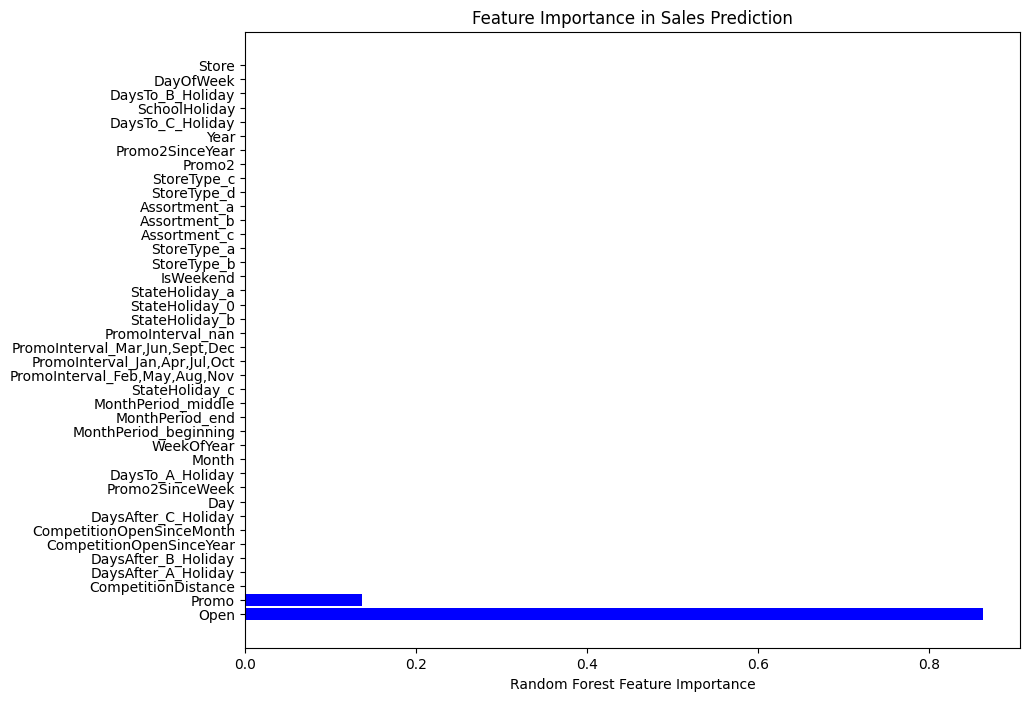

In [50]:
post_prediction_feature_importance(pipeline,train_data_preprocessed_df)


### Confidence Interval

In [51]:
from scripts.ml_model import post_prediction_confidence_interval


In [52]:
lower_and_upper_bound =post_prediction_confidence_interval(pipeline, train_data_preprocessed_df)
print(lower_and_upper_bound)

         Lower Bound  Upper Bound
0           0.635261     0.640394
1           0.635261     0.640394
2           0.635261     0.640394
3           0.635261     0.640394
4           0.635261     0.640394
...              ...          ...
1017204    -1.499723    -1.499723
1017205    -1.499723    -1.499723
1017206    -1.499723    -1.499723
1017207    -1.499723    -1.499723
1017208    -1.499723    -1.499723

[1017209 rows x 2 columns]


# Serialize Models

### It is essential to save the trained model with a timestamp for reproducibility and tracking.



In [53]:
from scripts.ml_model import save_model



In [54]:
save_model(pipeline,'models')

Model saved at models/model-2025-01-13-09-35-07.pkl
